In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../nba.csv')
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


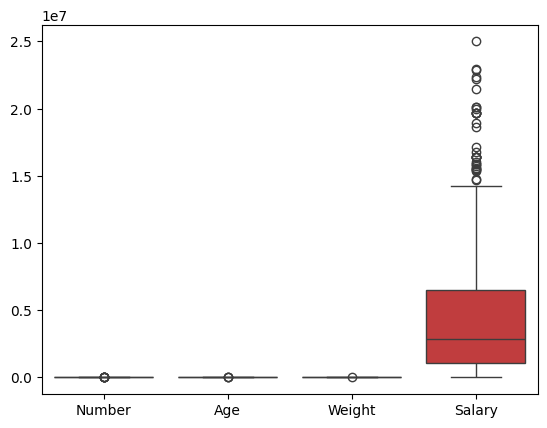

In [4]:
sns.boxplot(df)
plt.show()

In [5]:
df.isnull().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [6]:
df['Name'] = df['Name'].fillna(df['Name'][0])
df['Team'] = df['Team'].fillna(df['Team'].mode()[0])
df['Number'] = df['Number'].fillna(df['Number'].mean())
df['Position'] = df['Position'].fillna(df['Position'].mode()[0])
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Height'] = df['Height'].fillna(df['Height'].mode()[0])
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())
df['College'] = df['College'].fillna(df['College'].mode()[0])
df['Salary'] = df['Salary'].fillna(df['Salary'].median())
df.isnull().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

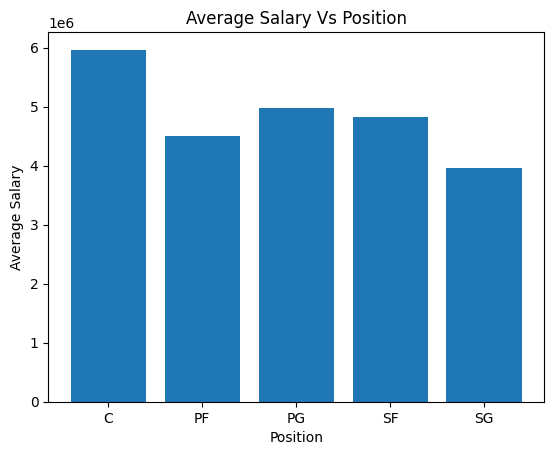

In [164]:
averaged_salaries = df.groupby('Position')['Salary'].mean()
plt.bar(averaged_salaries.index, averaged_salaries.values)
plt.title('Average Salary Vs Position')
plt.xlabel('Position')
plt.ylabel('Average Salary')
plt.show()


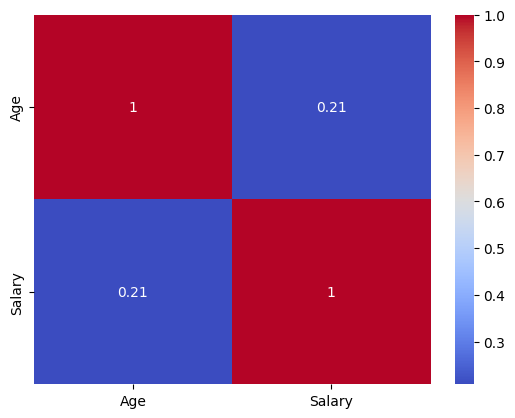

In [8]:
sns.heatmap(df[['Age', 'Salary']].corr(), annot=True, cmap='coolwarm')
plt.show()

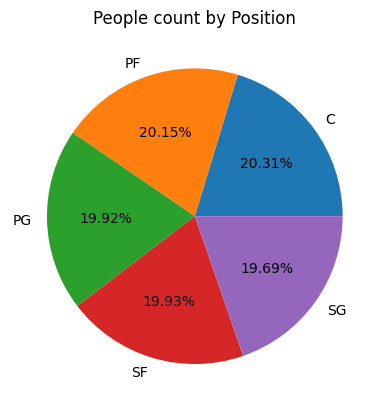

In [9]:
key_list = []
value_list = []
grouped_ages = df.groupby('Position')['Age'].mean()
plt.pie(grouped_ages.values, labels=grouped_ages.index,  autopct='%1.2f%%')
plt.title('People count by Position')
plt.show()

In [10]:
df['Team'].count

<bound method Series.count of 0            Boston Celtics
1            Boston Celtics
2            Boston Celtics
3            Boston Celtics
4            Boston Celtics
               ...         
453               Utah Jazz
454               Utah Jazz
455               Utah Jazz
456               Utah Jazz
457    New Orleans Pelicans
Name: Team, Length: 458, dtype: object>

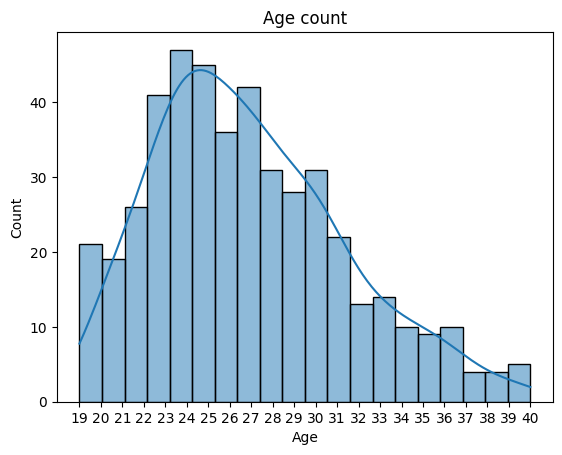

In [11]:
sns.histplot(df['Age'], kde=True, bins=20)
plt.xticks(range(19, 41, 1))
plt.title('Age count')
plt.show()

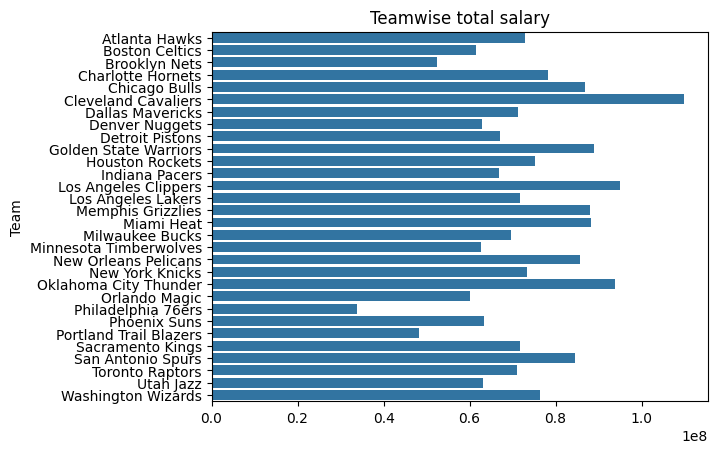

In [12]:
total_salary_grouped = df.groupby('Team')['Salary'].sum()
sns.barplot(y=total_salary_grouped.index, x=total_salary_grouped.values)
plt.title('Teamwise total salary')
plt.show()

In [13]:
df.describe()

,Number,Age,Weight,Salary
count,458.000000,458.000000,458.000000,4.580000e+02
mean,17.678337,26.938731,221.522976,4.790188e+06
std,15.948612,4.399195,26.339477,5.170063e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.100602e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.323553e+06
max,99.000000,40.000000,307.000000,2.500000e+07


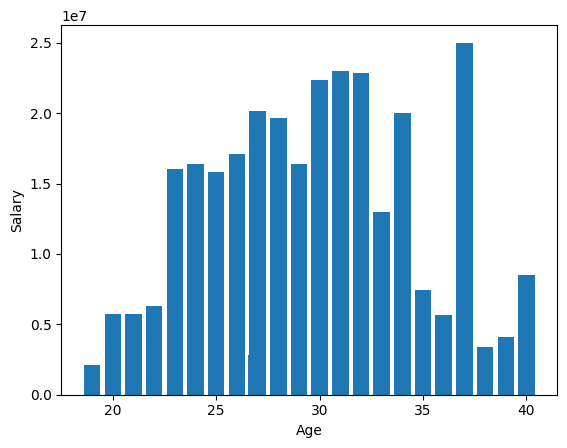

In [81]:
ans = df.groupby('Age')['Salary'].max()
age_list = []
sal_list = []
for key, value in ans.items():
    age_list.append(key)
    sal_list.append(value)
plt.bar(age_list, sal_list)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

College
Illinois      7-1
Washington    7-1
Maryland      7-1
Georgetown    7-2
Kentucky      7-3
Name: Height, dtype: object

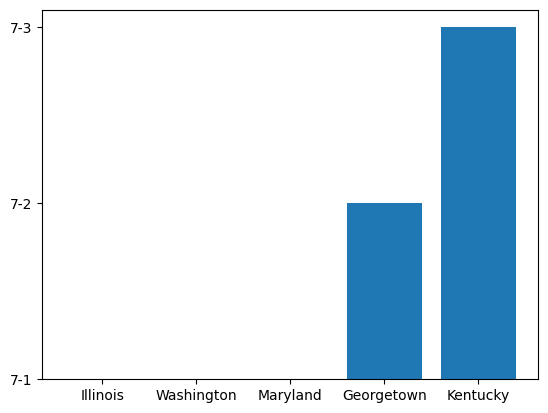

In [137]:
ans = df.groupby('College')['Height'].max().sort_values().tail(5)
plt.bar(ans.index, ans.values)
ans

College
UCLA               15
North Carolina     16
Kansas             18
Duke               20
Kentucky          107
Name: Name, dtype: int64

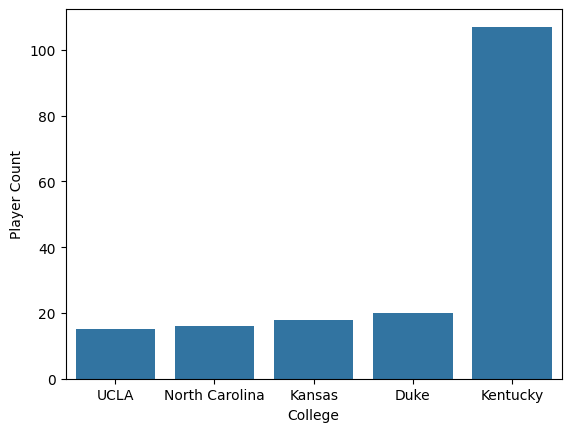

In [180]:
ans = df.groupby('College')['Name'].count().sort_values().tail()
sns.barplot(ans)
plt.ylabel('Player Count')
ans

In [183]:
df.sort_values(by=['Salary']).tail()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
339,Chris Bosh,Miami Heat,1.0,PF,32.0,6-11,235.0,Georgia Tech,22192730.0
251,Dwight Howard,Houston Rockets,12.0,C,30.0,6-11,265.0,Kentucky,22359364.0
33,Carmelo Anthony,New York Knicks,7.0,SF,32.0,6-8,240.0,Syracuse,22875000.0
169,LeBron James,Cleveland Cavaliers,23.0,SF,31.0,6-8,250.0,Kentucky,22970500.0
109,Kobe Bryant,Los Angeles Lakers,24.0,SF,37.0,6-6,212.0,Kentucky,25000000.0


In [154]:
print("Total no. of players:", df['Name'].size)
print("Total no. of colleges:", df['College'].unique().size)
print("Total no. of teams:", df['Team'].unique().size)

Total no. of players: 458
Total no. of colleges: 118
Total no. of teams: 30


1. Average Salary Vs Position
-> The maximum average salary holds the position C, the minimum average salary holds the position SG.
2. Correlation of Salary and Position
-> The salary and position is less related to each other with the value 0.21
3. Position-wise people count
-> The people with the position C holds maximum count while position SG holds minimum count.
4. People count w.r.t. age
-> As the disribution is shifted towards left, the distribution is left skewed.
5. Team-wise total salary
-> Team Cleveland Cavaliers holds maximum total of all its players' salary and team Orlando Magic holds the minimum.
6. Salary w.r.t. age
-> The maximum salary is earned by people of age 37, and minimum of age 19